In [6]:
from qiskit.providers.fake_provider import FakeBelem
from qiskit_aer import PulseSimulator
from qiskit import pulse, QuantumCircuit
from qiskit.circuit import Gate

backend = PulseSimulator().from_backend(FakeBelem())

with pulse.build(name=f'pulse_prog', backend=backend) as pulse_prog:
        pulse.play(pulse.library.gaussian_square(
            duration=64,
            sigma=1,
            amp=0.10223725901141269,
            risefall=1
        ), pulse.drive_channel(0))

gate_name = f'gate_{0}'
gate = Gate(gate_name, 1, params=[])

circs = []
for i in range(3, 375, 22):
    base_circ = QuantumCircuit(1, 1)
    for _ in range(i):
        base_circ.append(gate, [0])

    base_circ.add_calibration(gate_name, [0], pulse_prog)

    base_circ.measure(0, 0)

    circs.append(base_circ)

n_shots = 2048
job = backend.run(circs, shots=n_shots)

results = job.result()

C:\Users\eduar\AppData\Local\Temp\ipykernel_5060\3329803703.py:6: DeprecationWarning: The Pulse simulator backend in Qiskit Aer is deprecated and will be removed in a future release. Instead the qiskit-dynamics library should be used instead for simulating at the pulse level.
  backend = PulseSimulator().from_backend(FakeBelem())
C:\Users\eduar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\qiskit\compiler\assembler.py:458: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn(


In [14]:
import matplotlib.pyplot as plt

inputGraphX = []
inputGraphY = []
j = 0
for i in range(0, 375, 22):
    inputGraphX.append(i)
    inputGraphY.append(int(results.get_counts(j)["0"]/(n_shots/100)))
    j += 1


QiskitError: 'Result for experiment "17" could not be found.'

(90.0, 100.0)

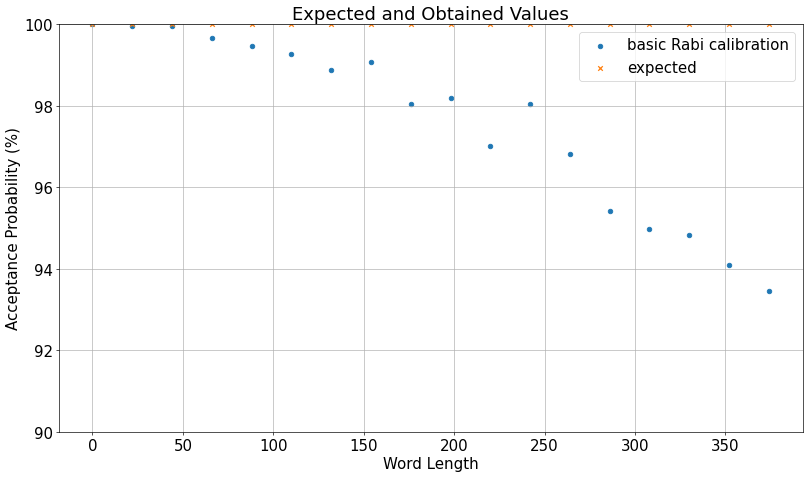

In [16]:

plt.figure(figsize=(16, 9), dpi=60)

plt.rc('font', **{'size' : 18})

plt.grid(True)

plt.title("Expected and Obtained Values")

plt.scatter(inputGraphX, inputGraphY, marker='o', s=30, label="basic Rabi calibration")
plt.scatter(inputGraphX, [100]*len(inputGraphX), marker='x', s=30, label="expected")
plt.xlabel("Word Length")
plt.ylabel("Acceptance Probability (%)")
plt.legend()
plt.ylim((90,100))

In [9]:
j = 0
f = open("./tests/3_FakeBelem.txt", "a")
for i in range(3, 375, 22):
    string = str(job.result().get_counts(j)["0"]) + "\n"
    f.write(string)
    j += 1
f.close()

In [15]:
f = open('./tests/0_FakeBelem.txt', 'r')

inputGraphX = []
inputGraphY = []
for i in range(0, 380, 22):
    inputGraphX.append(i)
    inputGraphY.append(int(f.readline())/20.48)

In [ ]:
import matplotlib.pyplot as plt

inputGraphX = []
inputGraphY = []
j = 0
for i in range(0, 375, 22):
    inputGraphX.append(i)
    inputGraphY.append(int(results.get_counts(j)["0"]/(n_shots/100)))
    j += 1

plt.figure(figsize=(16, 9), dpi=60)

plt.rc('font', **{'size' : 18})

plt.grid(True)

plt.title("Expected and Obtained Values")

plt.scatter(inputGraphX, inputGraphY, marker='o', s=30, label="basic Rabi calibration")
plt.scatter(inputGraphX, [100]*len(inputGraphX), marker='x', s=30, label="expected")
plt.xlabel("Word Length")
plt.ylabel("Acceptance Probability (%)")
plt.legend()
plt.ylim((90,100))

In [17]:
import tensorflow as tf
import tensorflow_probability as tfp

default_amp = 0.69564843
max_amp = default_amp + 0.001
min_amp = default_amp - 0.001

action_dist = tfp.distributions.Normal(1, 1)
action_dist_sample = action_dist.sample()
print(action_dist_sample)

action = tf.clip_by_value(((action_dist_sample + 1) / 2) * (max_amp - min_amp) + min_amp, min_amp, max_amp)
print(action)

tf.Tensor(-0.053901196, shape=(), dtype=float32)
tf.Tensor(0.69559455, shape=(), dtype=float32)
